In [2]:
ls

Analyze design accuracies.ipynb
Check preferred neighbors assignment for golfy 1.5.0.ipynb
Deconvolution.ipynb
Experiment with allow_extra_pools.ipynb
First stab.ipynb
Large numbers of peptides per pool.ipynb
Number of pools and iters for different params.ipynb
Slower second attempt.ipynb
Third swing.ipynb
designs.csv


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("designs.csv")

/Users/iskander/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


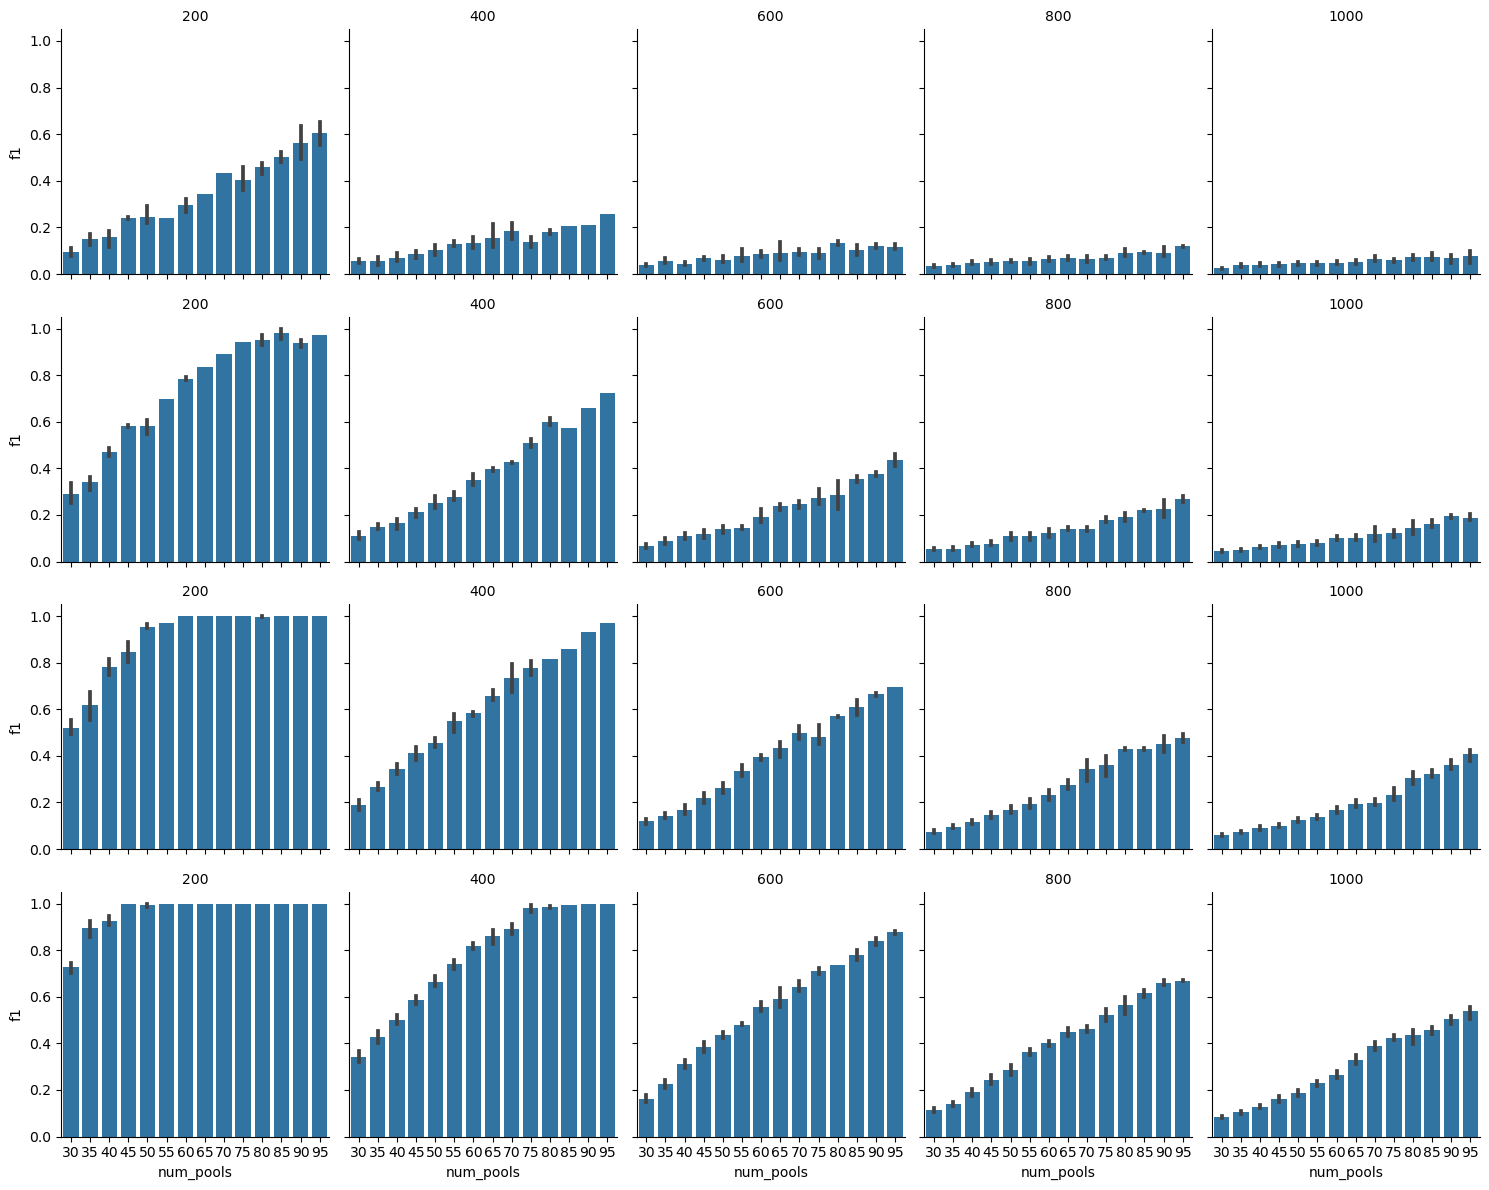

In [26]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

grid = sns.FacetGrid(df,  row="num_replicates", col="num_peptides", col_order=[200, 400, 600, 800, 1000])
bp = grid.map(sns.barplot, "num_pools", "f1")
# bp.add_legend()
bp.set_titles("{col_name}")

plt.show()


In [8]:
df

,num_peptides,max_peptides_per_pool,num_replicates,allow_extra_pools,precision,recall,f1,num_pools,num_violations
0,200,5,2,True,0.961,1.000,0.978,80,0
1,200,5,2,False,1.000,1.000,1.000,80,0
2,200,6,2,True,0.930,0.993,0.956,68,0
3,200,6,2,False,0.946,0.987,0.963,68,0
4,200,7,2,True,0.834,0.949,0.881,58,0
...,...,...,...,...,...,...,...,...,...
3048,1000,199,2,False,0.034,0.015,0.020,12,27630
3049,1000,199,3,True,0.365,0.502,0.418,96,0
3050,1000,199,3,False,0.083,0.054,0.063,18,77328
3051,1000,199,4,False,0.057,0.048,0.051,24,147296


In [25]:
df[(df.num_peptides == 400) & (df.f1 == 1.0)]

,num_peptides,max_peptides_per_pool,num_replicates,allow_extra_pools,precision,recall,f1,num_pools,num_violations
283,400,17,4,False,1.0,1.0,1.0,96,128
289,400,18,4,False,1.0,1.0,1.0,92,54
294,400,19,4,True,1.0,1.0,1.0,93,0
295,400,19,4,False,1.0,1.0,1.0,88,102
306,400,21,4,True,1.0,1.0,1.0,90,0
307,400,21,4,False,1.0,1.0,1.0,80,412
312,400,22,4,True,1.0,1.0,1.0,92,0
314,400,22,5,False,1.0,1.0,1.0,95,1996
319,400,23,4,True,1.0,1.0,1.0,94,0
321,400,23,5,False,1.0,1.0,1.0,90,2532


In [27]:
df_600 = df[df.num_peptides == 600]

In [29]:
df_600_5 = df_600[df_600.num_replicates == 5]


<Axes: xlabel='max_peptides_per_pool', ylabel='f1'>

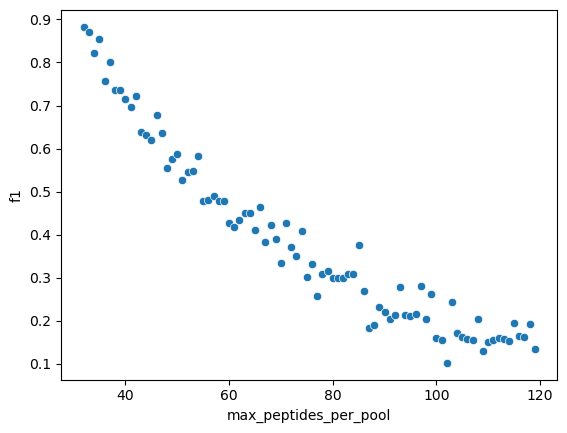

In [31]:
sns.scatterplot(data=df_600_5, x="max_peptides_per_pool", y="f1")

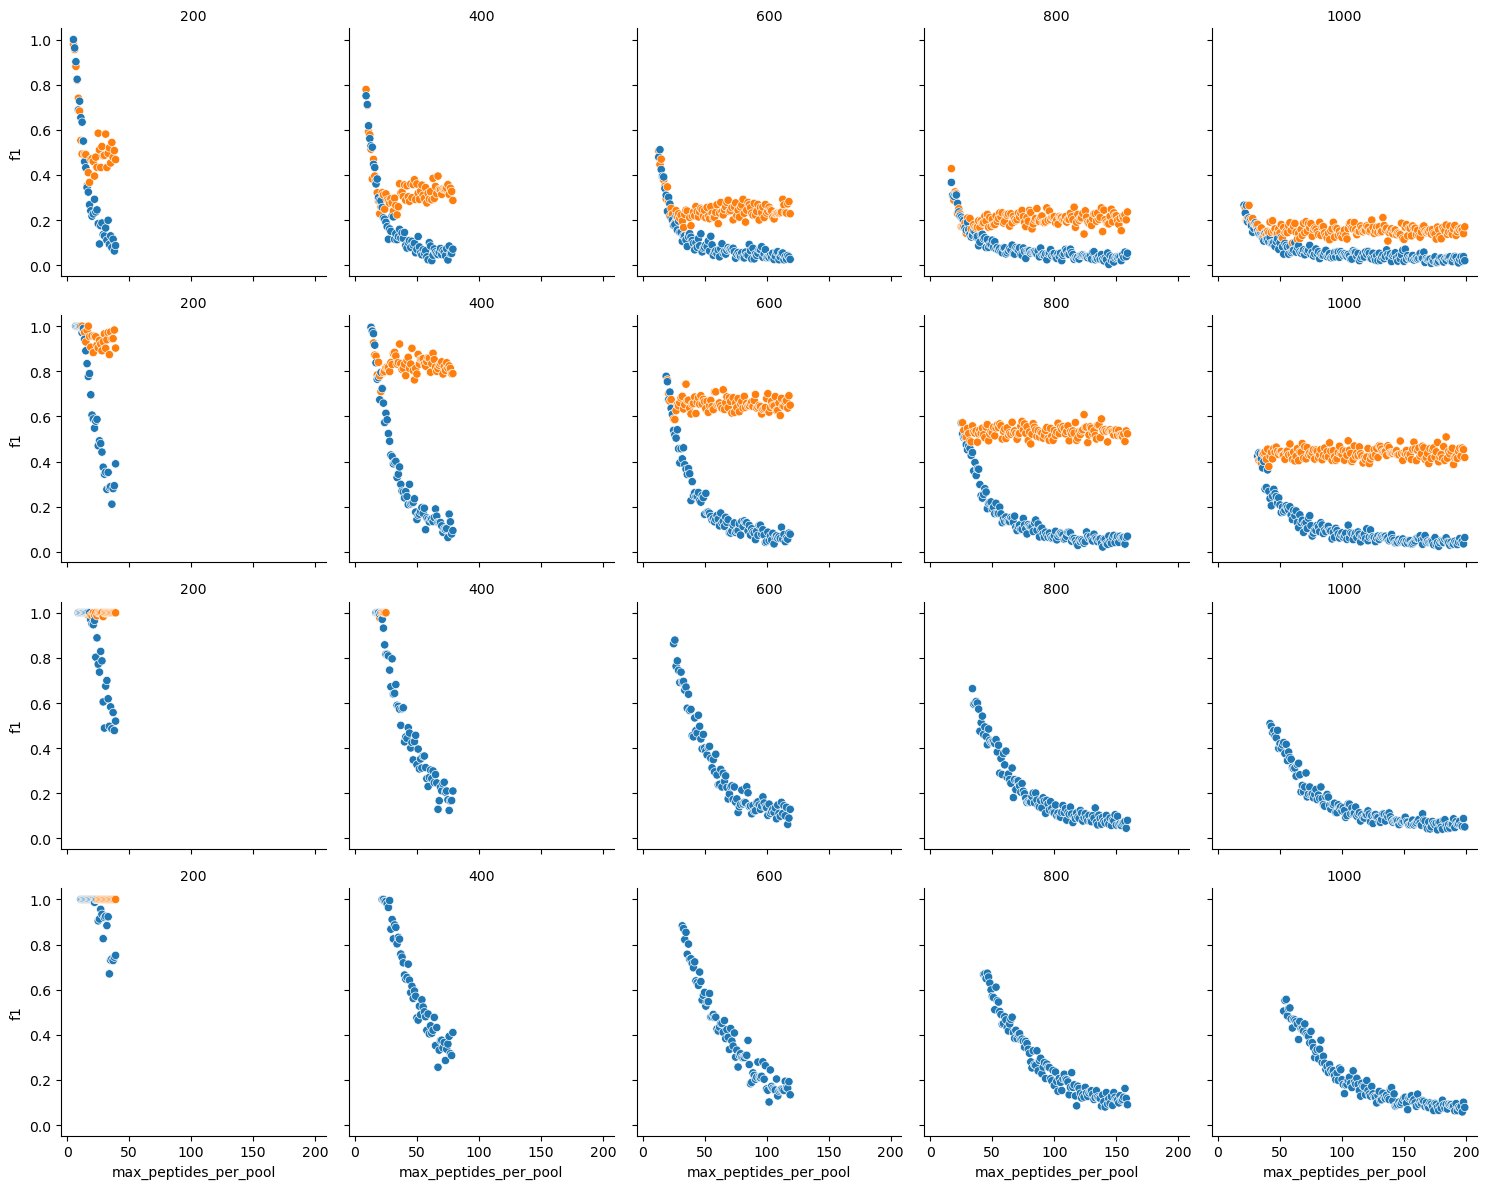

In [36]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

grid = sns.FacetGrid(df,  row="num_replicates", col="num_peptides", col_order=[200, 400, 600, 800, 1000])
bp = grid.map(sns.scatterplot, "max_peptides_per_pool", "f1", "allow_extra_pools")
# bp.add_legend()
bp.set_titles("{col_name}")

plt.show()

In [37]:
df["mean_peptides_per_pool"] = (df.num_peptides * df.num_replicates) / (df.num_pools)

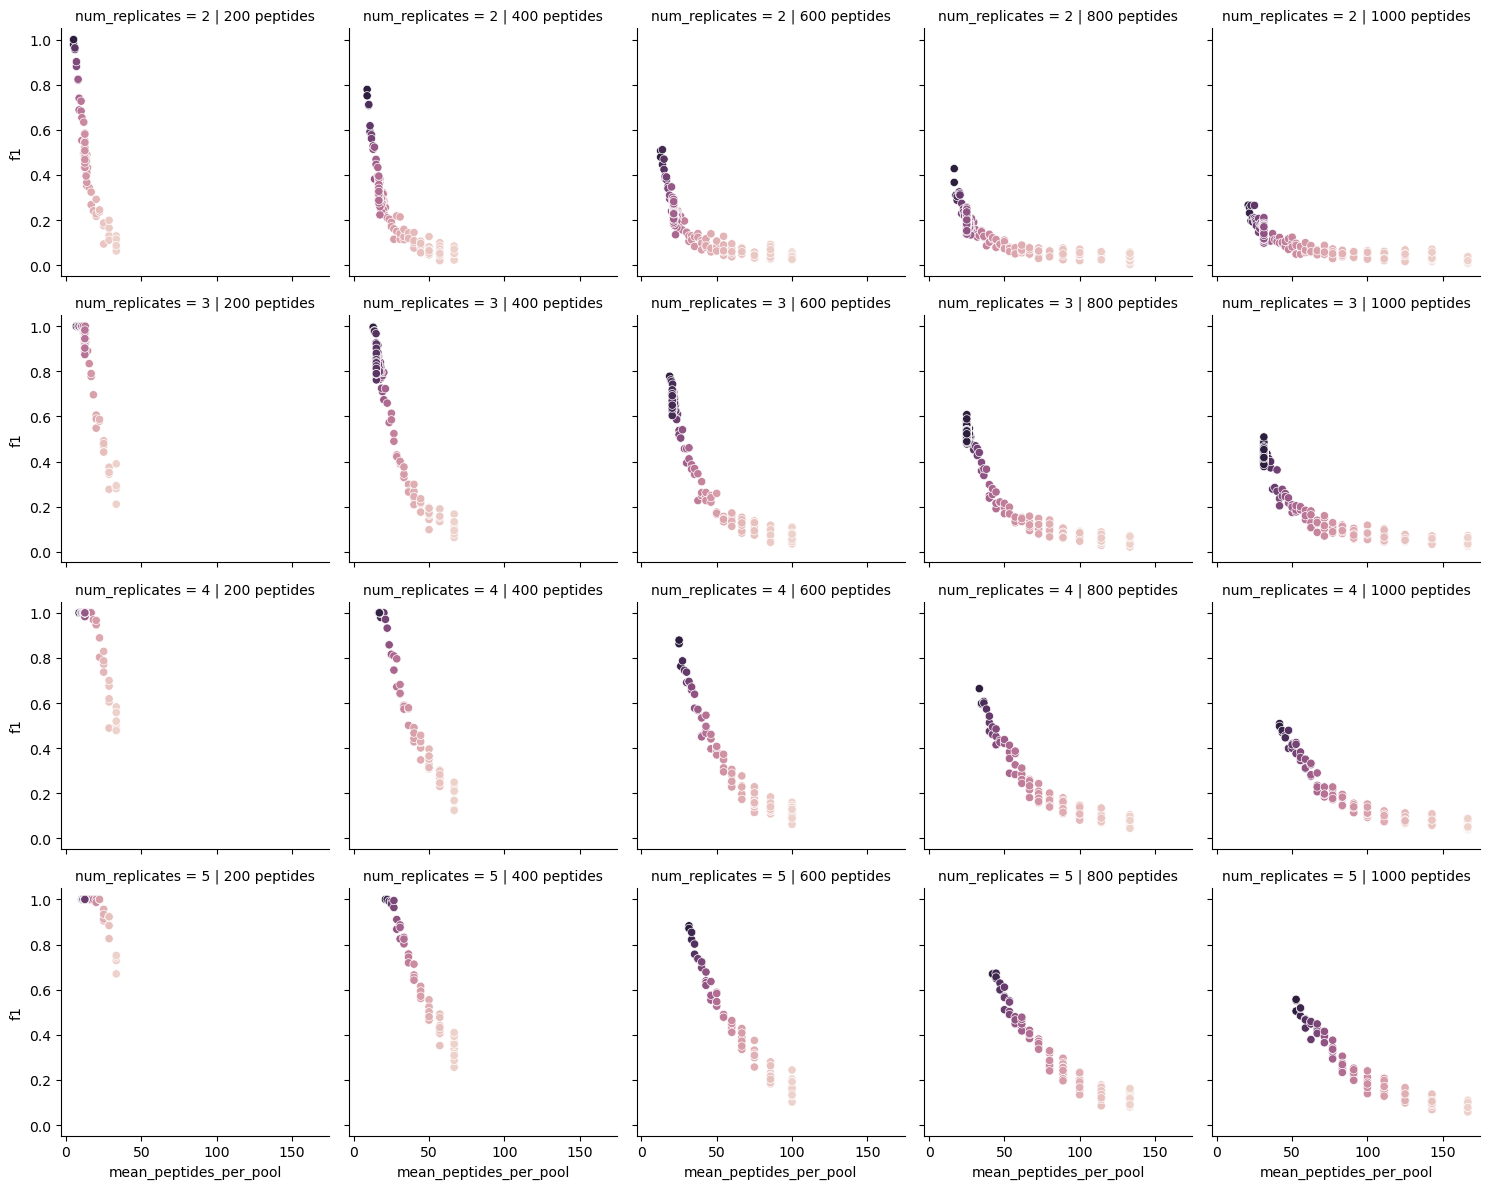

In [44]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

grid = sns.FacetGrid(df,  row="num_replicates", col="num_peptides", col_order=[200, 400, 600, 800, 1000])
bp = grid.map(sns.scatterplot, "mean_peptides_per_pool", "f1", "num_pools")
# bp.add_legend()
bp.set_titles(col_template="{col_name} peptides")

plt.show()


In [45]:
grid.savefig("f1-grid.png")

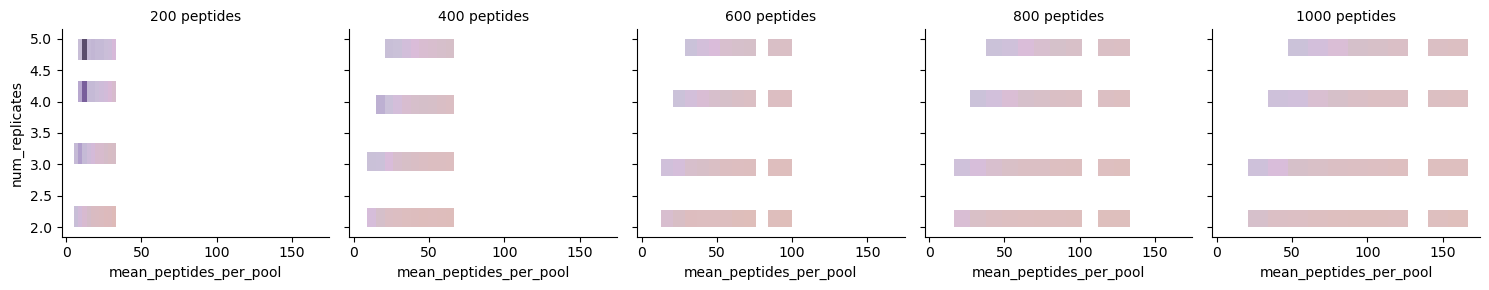

In [48]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

grid = sns.FacetGrid(df,  col="num_peptides", col_order=[200, 400, 600, 800, 1000])
bp = grid.map(sns.histplot,  "mean_peptides_per_pool", "num_replicates", "f1")
# bp.add_legend()
bp.set_titles(col_template="{col_name} peptides")

plt.show()


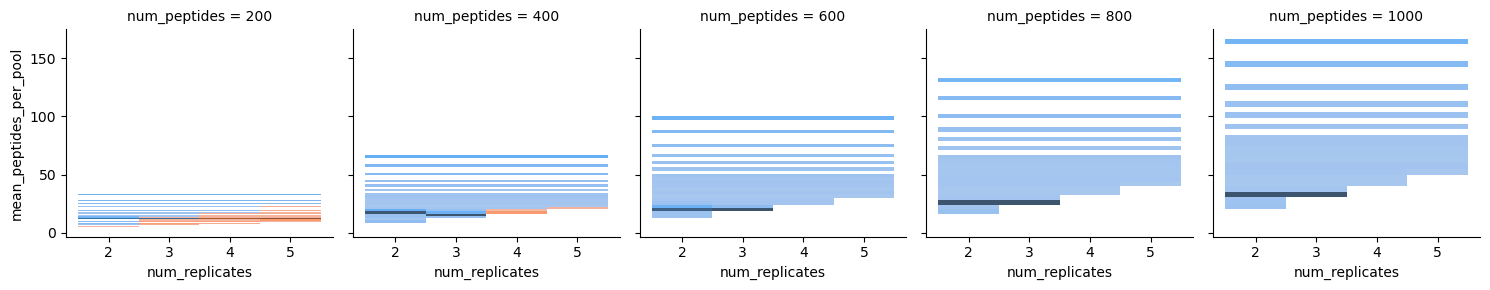

In [70]:
df['num_violations'] = df.num_violations.astype(int)
df['num_peptides'] = df.num_peptides.astype(int)
df['num_replicates'] = df.num_replicates.astype(int)

df["perfect_deconv"] = (df.f1 > 0.999)

df["no_violations"] = (df.num_violations == 0)
grid = sns.FacetGrid(df,  col="num_peptides", col_order=[200, 400, 600, 800, 1000])
bp = grid.map(
    sns.histplot,   
    "num_replicates",  
    "mean_peptides_per_pool", 
    "perfect_deconv",
    bins=30, 
    discrete=(True, False), 
    log_scale=(False, False))

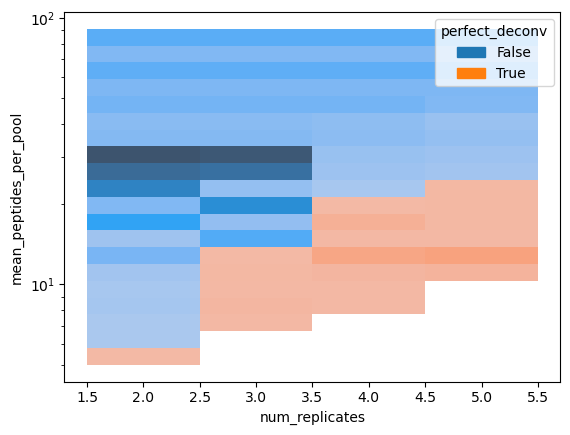

In [89]:
df['num_violations'] = df.num_violations.astype(int)
df['num_peptides'] = df.num_peptides.astype(int)
df['num_replicates'] = df.num_replicates.astype(int)

df["perfect_deconv"] = (df.f1 > 0.999)

df["no_violations"] = (df.num_violations == 0)
df["has_violations"] = (df.num_violations > 0)

bp = sns.histplot(
    data=df[(df.mean_peptides_per_pool < 100)],
    x="num_replicates",  
    y="mean_peptides_per_pool", 
    hue="perfect_deconv",
    bins=20, 
    discrete=(True, False), 
    log_scale=(False, True))

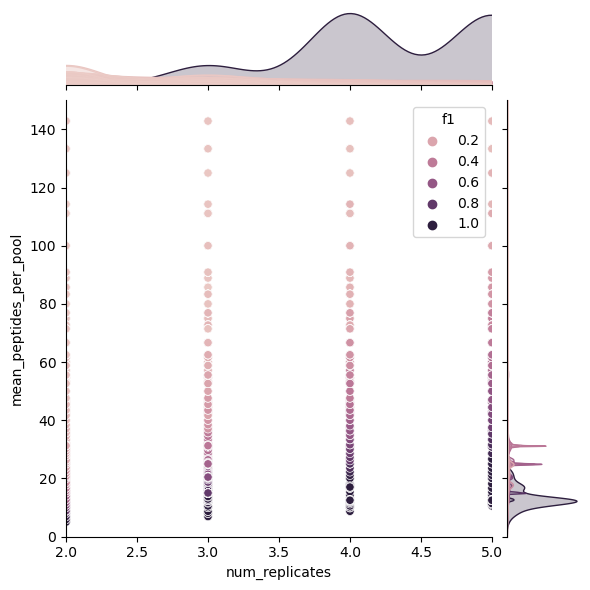

In [94]:
sns.jointplot(    
    data=df,
    x="num_replicates",  
    y="mean_peptides_per_pool", 
    hue="f1",
    
    xlim=[2, 5],
    ylim=[0, 150],
)

In [98]:
df

,num_peptides,max_peptides_per_pool,num_replicates,allow_extra_pools,precision,recall,f1,num_pools,num_violations,mean_peptides_per_pool,perfect_deconv,no_violations,has_violations
0,200,5,2,True,0.961,1.000,0.978,80,0,5.000000,False,True,False
1,200,5,2,False,1.000,1.000,1.000,80,0,5.000000,True,True,False
2,200,6,2,True,0.930,0.993,0.956,68,0,5.882353,False,True,False
3,200,6,2,False,0.946,0.987,0.963,68,0,5.882353,False,True,False
4,200,7,2,True,0.834,0.949,0.881,58,0,6.896552,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,1000,199,2,False,0.034,0.015,0.020,12,27630,166.666667,False,False,True
3049,1000,199,3,True,0.365,0.502,0.418,96,0,31.250000,False,True,False
3050,1000,199,3,False,0.083,0.054,0.063,18,77328,166.666667,False,False,True
3051,1000,199,4,False,0.057,0.048,0.051,24,147296,166.666667,False,False,True


<Axes: xlabel='None-num_replicates-mean_peptides_per_pool'>

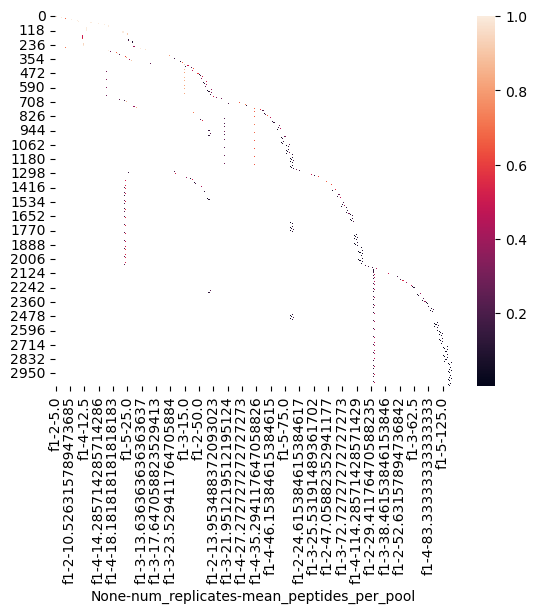

In [105]:
sns.heatmap()

<Axes: >

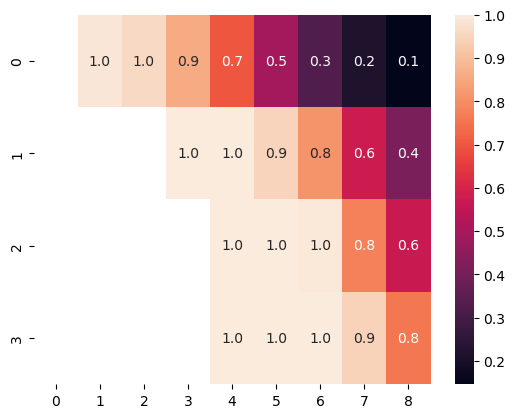

In [129]:
import numpy as np
base = 1.5
minval = int(np.log2(5) / np.log2(base))
m = int(np.log2(166) / np.log2(base)) - minval
x = np.zeros((4, m), dtype='float')
for r in range(2, 6):
    for i in range(m):
        ii = base ** i + minval
        iii = base ** (i + 1) + minval
        df_subset = df[(df.num_replicates == r) & (df.mean_peptides_per_pool > ii) & (df.mean_peptides_per_pool < iii)]
        if len(df_subset) > 0:
            x[r-2, i] = df_subset.f1.mean()
x[x == 0] = np.nan     
sns.heatmap(x, annot=True, fmt="0.1f")

In [123]:
np.log2(166)/np.log2(1.5)

12.60771318204978

In [131]:
df_6_to_10 = pd.read_csv("designs-replicates-6-to-10.csv")
df_2_to_5 = pd.read_csv("designs-96-wells-replicates-2-to-5.csv")
df = pd.concat([df_2_to_5, df_6_to_10])

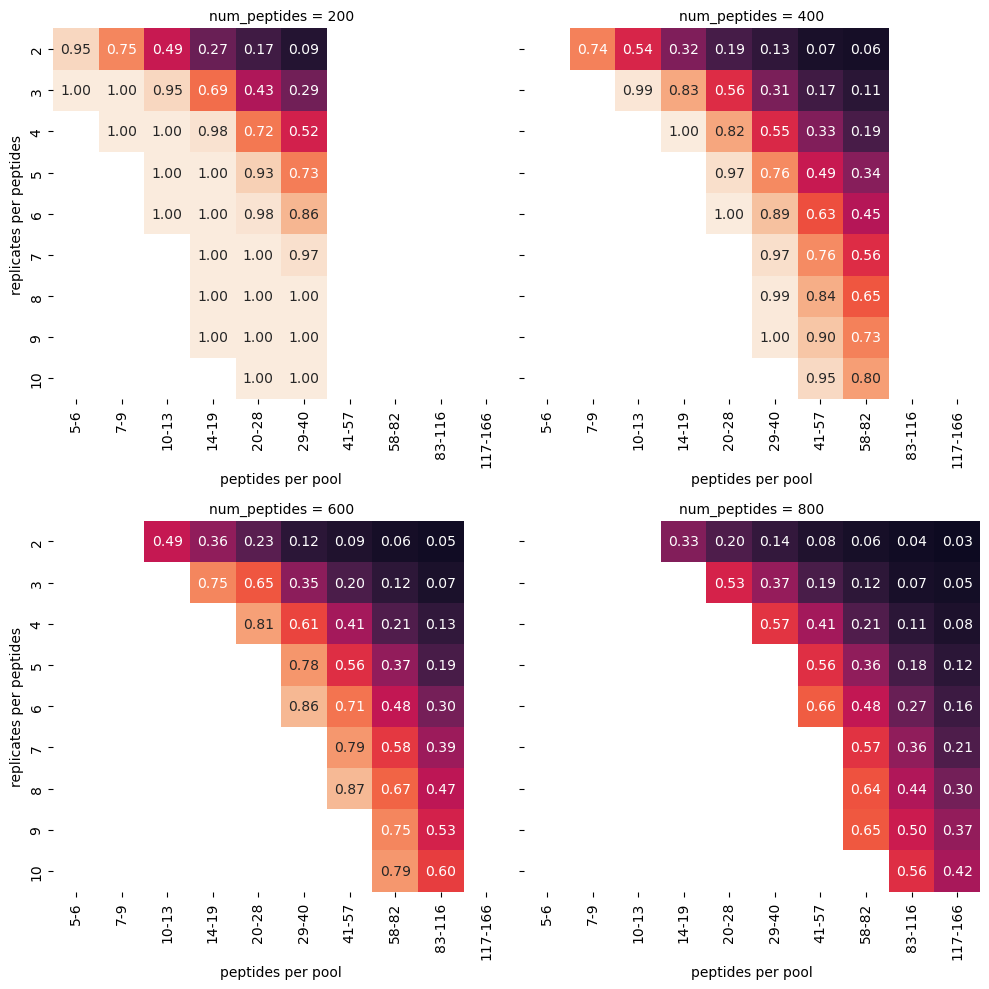

In [217]:
df_6_to_10 = pd.read_csv("designs-96-wells-replicates-6-to-10.csv")
df_2_to_5 = pd.read_csv("designs-96-wells-replicates-2-to-5.csv")
df = pd.concat([df_2_to_5, df_6_to_10])

df["mean_peptides_per_pool"] = df.num_replicates * df.num_peptides / df.num_pools
df['num_violations'] = df.num_violations.astype(int)
df['num_peptides'] = df.num_peptides.astype(int)
df['num_replicates'] = df.num_replicates.astype(int)

df["perfect_deconv"] = (df.f1 > 0.999)

df["no_violations"] = (df.num_violations == 0)
df["has_violations"] = (df.num_violations > 0)

import numpy as np
import matplotlib.pyplot as plt

num_bins = 10
r_min = df.num_replicates.min()
r_max = df.num_replicates.max()
rs = np.arange(r_min, r_max + 1)
num_rs = len(rs)

base = 1.5
mppp_min = df.mean_peptides_per_pool.min()
mppp_max = df.mean_peptides_per_pool.max()

mppp_min_log = np.log2(mppp_min) / np.log2(base)
mppp_max_log = np.log2(mppp_max) / np.log2(base)

mppp_log_bin_boundaries = np.linspace(mppp_min_log, mppp_max_log, num_bins + 1)
mppp_bin_boundaries = base ** mppp_log_bin_boundaries 

int_bins = mppp_bin_boundaries.round().astype(int)
xticklabels = ["%s-%s" % (x, y - 1) for (x, y) in zip(int_bins[:-1], int_bins[1:])]

def draw_heatmap(*args, **kwargs):
    df_curr = kwargs.pop('data')
    x = np.zeros((num_rs, num_bins), dtype='float')

    for r in rs:
        for i, bin_min in enumerate(mppp_bin_boundaries):
            if i == len(bins) - 1:
                continue 
            bin_max = mppp_bin_boundaries[i + 1]

            df_subset = df_curr[
                (df_curr.num_replicates == r) & 
                (df_curr.mean_peptides_per_pool >= bin_min) & 
                (df_curr.mean_peptides_per_pool < bin_max)]
            if len(df_subset) > 0:
                x[r-r_min, i] = df_subset.f1.mean()
    x[x == 0] = np.nan    
    sns.heatmap(x, 
                annot=True, 
                fmt="0.2f", 
                xticklabels=xticklabels,
                yticklabels=rs, 
                vmin=0, 
                vmax=1, 
                cbar=False)
    plt.xlabel("peptides per pool")
    plt.ylabel("replicates per peptide")
fg = sns.FacetGrid(df[df.num_peptides < 1000], col='num_peptides', col_wrap=2, height=5, sharex=False)
fg.map_dataframe(draw_heatmap)
fg.savefig("heatmaps.png")


In [146]:
df.num_replicates.value_counts()

2     1069
3     1005
4      512
5      467
6      411
7      367
8      348
9      300
10     264
Name: num_replicates, dtype: int64

In [190]:
df[(df.num_peptides > 400) & (df.f1 > 0.99)]

,num_peptides,max_peptides_per_pool,num_replicates,allow_extra_pools,precision,recall,f1,num_pools,num_violations,perfect_deconv,no_violations,has_violations,mean_peptides_per_pool
